![MLU Logo](../data/MLU_Logo.png)

# <a name="0">Machine Learning Accelerator - Computer Vision - Lecture 3</a>


## Object Detection with YOLO

In this notebook, we use pre-trained YOLO models for object detection task, with only a few
lines of code. Here are the topics for this notebook:

1. <a href="#1">Downloading a Pretrained Model</a>      
2. <a href="#2">Preprocessing an Image</a>
3. <a href="#3">Inference and Visualizating</a>
4. <a href="#4">Putting it all Together</a>
    

First let's import the libraries. If you haven't got `gluoncv` installed at your current kernel, run the following line:

In [1]:
! pip install -q gluoncv

You are using pip version 10.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
%matplotlib inline
from gluoncv import model_zoo
from gluoncv.data.transforms.presets import imagenet, yolo
from gluoncv.utils.viz import image, plot_bbox
from matplotlib import pyplot as plt
from mxnet.image import imread

## 1. <a name="1">Downloading a Pretrained Model</a>
(<a href="#0">Go to top</a>)

Let's get an YOLOv3 model as the base model. It was trained on Pascal VOC
dataset with Darknet53. 

By specifying ``pretrained=True``, it will automatically download the model and its weights from the model zoo if necessary. There are over 200 pretrained models in GluonCV model zoo. For more pretrained models, please refer to
[GluonCV Model Zoo](https://gluon-cv.mxnet.io/model_zoo/index.html).



In [3]:
net = model_zoo.get_model('yolo3_darknet53_voc', pretrained=True)

## 2. <a name="2">Pre-processing an Image</a>
(<a href="#0">Go to top</a>)

Next we download an image for inference. You can
feed an arbitrarily sized image, except one constraint for 
YOLO is that input height and width can be divided by 32.


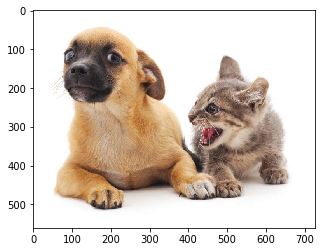

In [4]:
test_image = '../data/catdog.png'
im_fname = imread(test_image)
image.plot_image(im_fname)

Then we pre-process the image with a built-in YOLO 
data transforms:

```python 
    data.transforms.presets.yolo.load_test()
```

where we specify that we resize the short edge of the image to 512 px. 

We can also provide a list of image file names to this function, 
such as ``[im_fname1, im_fname2, ...]`` if we want to load multiple images together.

This function returns two results. The first is a ndarray with shape
`(batch_size, RGB_channels, height, width)`. It can be fed into the
model directly. The second one contains the images in numpy format to
easy to be plotted. Since we only loaded a single image, there is only one output, 
i.e., the first dimension of `x` is 1.



In [5]:
x, img = yolo.load_test(test_image)
print('Shape of pre-processed image:', x.shape)

Shape of pre-processed image: (1, 3, 416, 540)


## 3. <a name="3">Inference and Visualizating</a>
(<a href="#0">Go to top</a>)

The forward function, i.e. `net(x)` will return all detected bounding boxes, and the
corresponding predicted class IDs and confidence scores. Their shapes are
`(batch_size, num_bboxes, 1)`, `(batch_size, num_bboxes, 1)`, and
`(batch_size, num_bboxes, 4)`, respectively.

The scores are ranked from high to low. Let's print out the `scores` which are greater than 80% confidence, and their correpsonding `class_ID`.

In [6]:
class_IDs, scores, bounding_boxs = net(x)

for c, s in zip(class_IDs.reshape(-1,), scores.reshape(-1,)):
    if s.asscalar() < 0.8:
        break
    print ("Class ID : {}".format(c.asscalar()), "score : {}".format(s.asscalar()))

Class ID : 11.0 score : 0.9946417808532715
Class ID : 7.0 score : 0.9910183548927307


To better visualize the outuputs bounding boxes in the test image, we can use:

```python 
    gluoncv.utils.viz.plot_bbox()
``` 

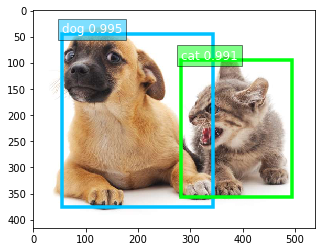

In [7]:
ax = plot_bbox(img, bounding_boxs[0], scores[0],
               class_IDs[0], class_names=net.classes)
plt.show()

## 4. <a name="4">Putting it all Together</a>
(<a href="#0">Go to top</a>)

Let's load another real life example and make the prediction with the same YOLO model to verify its stability.

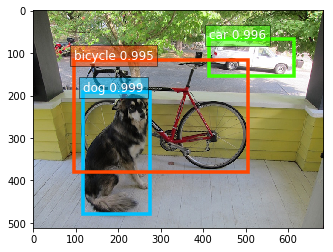

In [9]:
dog_bike = '../data/bikedog.jpg'

dog_bike_raw, dog_bike_img = yolo.load_test(dog_bike, short=512)
dog_bike_class_IDs, dog_bike_scores, dog_bike_bounding_boxs = net(dog_bike_raw)
ax = plot_bbox(dog_bike_img, dog_bike_bounding_boxs[0], dog_bike_scores[0],
                         dog_bike_class_IDs[0], class_names=net.classes)
plt.show()

Is the YOLO model inference simple and straightforward? If you want to learn object detection techniques, feel free to check more techniques at D2L [Compuater Vision chapter](https://d2l.ai/chapter_computer-vision/index.html).